Lo scopo dell' elaborato è creare una selezione di capi d'abbigliamento per un nuovo ecommerce di abiti usati.

In breve quello che sarà fatto è determinare in base ai dati che abbiamo quale sia la giusta combinazione di prodotti dalla quale partire.

Passaggi dell' elaborato:

1) Analisi esplorativa dei dati così impostata:
        
        a) Informazioni generiche sui dati
        b) Distribuzione numerica dei dati e ricerca di outliers
        c) Conversione altezza in dato numerico e sostituzioni dati nulli 
           con altezza media
    
2) Analisi sui dati riguardanti le misure per le scarpe per capire se tra gli articoli venduti c'è un quantitativo importante di calzature. Nel caso non avessimo un risultato soddisfacente procediamo con lo scartare i dati sulle misure delle scarpe.

3) Analisi delle categorie di abbigliamento per vedere quali mostrano volumi di vendita migliori

4) Analisi item più venduti per categoria

5) Ripartizione della quantità di articoli in base alle percentuali di vendita delle categorie

6) Analisi scelta delle taglie così impostata:
                
        a) Analisi distribuzione delle taglie
        b) Selezione taglie
 
7) DataFrame con i prodotti selezionati. Ciascun prodotto è accompagnato dalla percentuale di magazzino suggerita

8) Suggerimento sulla ripartizione delle taglie in base alla frequenza trovata nel nostro dataset

9) Pulizia finale Dataset
10) Conclusioni

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import re

In [2]:
# Definizione e prima visualizzazione del Dataframe
df_vestiti = pd.read_json('modcloth_final_data.json',lines = True)
df_vestiti.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


#

1) ANALISI ESPLORATIVA DATI (EDA)

    a) RACCOLTA DI INFO GENERICHE SUI DATI

In [3]:
# Quantità di dati totali e quantità dati null per categoria
print('Numero articoli:',len(df_vestiti),'\n')
df_vestiti.info()

Numero articoli: 82790 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review

In [4]:
# Valori unici per categoria
df_vestiti.nunique()

item_id            1378
waist                31
size                 29
quality               5
cup size             12
hips                 31
bra size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe size            15
shoe width            3
review_summary    61713
review_text       73313
dtype: int64

Dall' analisi esplorativa dei dati si vede che:
- Waist ha una quantità di dati null molto alta
- Shoe width e shoe size e Bust sono anch'esse piene di dati null

    b) DESCRIZIONE DATI NUMERICI E RICERCA OUTLIERS

In [5]:
# Visualizzazione tabella riassuntiva dati numerici
df_vestiti.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


Dalla tabella si vede che le scarpe hanno un outlier nel max

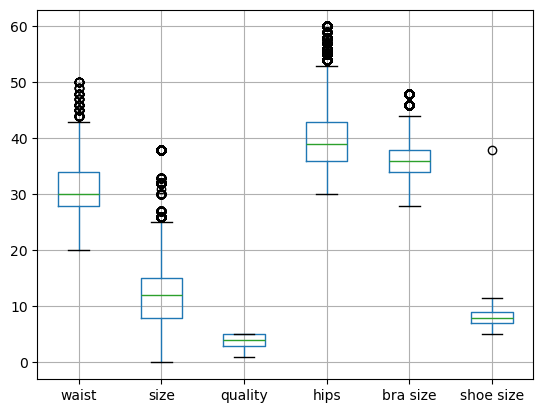

In [6]:
# Visualizzazione dati con grafico per migliorare l'analisi.
df_vestiti[['waist','size','quality','hips','bra size','shoe size']].boxplot()
plt.show()

Si vede dal grafico e dalla tabella che la shoe size presenta un outlier che distacca di molto dalla media. Probabilmente qualcuno ha sbagliato ad inserire oppure si è confuso con una taglia non americana.

In [7]:
# Riga con outlier
df_vestiti[df_vestiti['shoe size']== 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


Scartiamo questa riga per eliminare l'outlier.

In [8]:
# Creazione nuovo DataFrame per mantenere quello originale intatto
df_vestiti_mod = df_vestiti.drop(37313)

In [9]:
df_vestiti_mod.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82789.000000,2881.000000,82789.000000,82721.000000,56063.000000,76771.000000,82789.000000,27914.000000
mean,469325.861902,31.317945,12.661610,3.949046,40.358400,35.972125,498852.721557,8.144748
std,214001.018324,5.303326,8.272002,0.992782,5.827169,3.224928,286357.258295,1.324130
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252912.000000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497916.000000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744746.000000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,11.500000


    c) CONVERSIONE ALTEZZA IN DATO NUMERICO E SOSTITUZIONI DATI NULLI 
       CON MEDIA ALTEZZA

Conversione dal sistema imperiale a quello metrico decimale

In [10]:
for height in df_vestiti_mod['height']:
    if type(height) == str:
        alt = re.findall(r'\d+', height)
        if len(alt) == 2:
            altezza = float(alt[0])*30.48 + float(alt[1])*2.54
        elif len(alt) == 1:
            altezza = float(alt[0])*30.48
        df_vestiti_mod.loc[df_vestiti_mod['height'] == height,'height'] = int(altezza)

In [11]:
# DataFrame con altezze convertite in cm
df_vestiti_mod

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,172,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,165,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,162,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,160,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


Dopo la conversione dei dati dell'altezza affrontiamo i valori mancanti.
Essendo un dato continuo si potrebbe rimpiazzarlo con la media delle altezze

In [12]:
# Converto i dati altezza in dati numerici float
df_vestiti_mod['height']=df_vestiti_mod['height'].astype(float)
df_vestiti_mod.describe()

,item_id,waist,size,quality,hips,bra size,height,user_id,shoe size
count,82789.000000,2881.000000,82789.000000,82721.000000,56063.000000,76771.000000,81682.000000,82789.000000,27914.000000
mean,469325.861902,31.317945,12.661610,3.949046,40.358400,35.972125,165.044208,498852.721557,8.144748
std,214001.018324,5.303326,8.272002,0.992782,5.827169,3.224928,7.239555,286357.258295,1.324130
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,91.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,160.000000,252912.000000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,165.000000,497916.000000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,170.000000,744746.000000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,241.000000,999972.000000,11.500000


In [13]:
# Sostituiamo i valore nulli dell'altezza con la media
df_vestiti_mod['height'].fillna(df_vestiti_mod['height'].mean())

0        167.000000
1        157.000000
2        170.000000
3        165.044208
4        157.000000
            ...    
82785    172.000000
82786    165.000000
82787    162.000000
82788    160.000000
82789    182.000000
Name: height, Length: 82789, dtype: float64

In [14]:
# Rinomino la colonna height aggiungendo cm
df_vestiti_mod = df_vestiti_mod.rename(columns=({'height':'height (cm)'}))

#

2) ANALISI SUI DATI RIGUARDANTI LE MISURE PER LE SCARPE

Lo scopo è capire se tra gli articoli venduti c'è un quantitativo importante di calzature. Nel caso non avessimo un risultato soddisfacente procediamo con lo scartare i dati dulle misure delle scarpe.

N.B.
Per importante si intende che sia almeno il 15% dei prodotti venduti.
Tale valore deriva dalla quota di mercato che hanno le calzature nel settore dell' abbigliamento

Per prima cosa si crea un DataFrame con solo le righe contenenti i dati sulle scarpe.

In [15]:
df_shoes_1 = df_vestiti_mod.loc[df_vestiti_mod['shoe size'].notnull()]

Dopo aver separato tali dati si elencano le varie categorie di oggetti ed eventualmente si andranno ad eliminare dal nostro df_shoes le righe che chiaramente non sono scarpe

In [16]:
# lista delle categorie
df_shoes_1['category'].value_counts().index

Index(['new', 'tops', 'bottoms', 'dresses', 'outerwear', 'sale', 'wedding'], dtype='object', name='category')

Dando una rapida occhiata non troveremo calzature nelle categorie seguenti:
- tops
- dresses

Possiamo perciò escluderle dall' analisi sulle calzature

In [17]:
# Esclusione tops e dresses 
df_shoes_1 = df_shoes_1.loc[(df_shoes_1['category']!='tops') & (df_shoes_1['category']!='dresses')]

In [18]:
# Elementi totali rimasti una volta esclusi tops e dresses
df_shoes_1['category'].value_counts().sum()

15209

Procediamo con una ricerca per parole chiave nelle recensioni, per vedere quante volte appare la parola shoe, high heels, sandals, boots, sneakers, footwear.

L' idea è che difficilmente una recensione che non contiene tali parole chiave possa essere collegata ad un acquisto di calzature

In [51]:
# Ricerca per parole chiave
df_shoes_finale = df_shoes_1.loc[df_shoes_1['review_text'].str.contains('shoe|high heels|sandal|sneaker|boots|footwear')==True,'review_text'].reset_index()

In [52]:
df_shoes_finale

,index,review_text
0,6748,This dress is fantastic! I was hesitant to buy...
1,6757,This dress is a piece you can keep in your clo...
2,7059,"Lovely dress, lovely color, very happy. I'm in..."
3,7076,Love this dress! Wore it for a wedding with a ...
4,7308,"Love it. I got it for a wedding, wore it with ..."
...,...,...
197,81855,"I usually wear a 2x in modcloth dresses, I got..."
198,82178,An absolutely fabulous coat! Like opening a Ch...
199,82264,I've been searching for the perfect winter coa...
200,82506,Great quality and a beautiful coat but take in...


Come si vede dal controllo incrociato ci sono pochissime recensioni che contengono parole chiave collegabili alle scarpe.

Le categorie shoe size e shoe width possano essere eliminate.

In [20]:
# Eliminazione colonne 'shoe size' e 'shoe width'
df_vestiti_mod = df_vestiti_mod.drop(['shoe size','shoe width'],axis = 1)

In [21]:
df_vestiti_mod

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height (cm),user_name,length,fit,user_id,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.0,Emily,just right,small,991571,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.0,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.0,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.0,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,172.0,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,165.0,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,162.0,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,160.0,jennaklinner,just right,fit,756491,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


#

3) ANALISI DELLE CATEGORIE DI ABBIGLIAMENTO PER VEDERE QUALI MOSTRANO VOLUMI DI VENDITA MIGLIORI

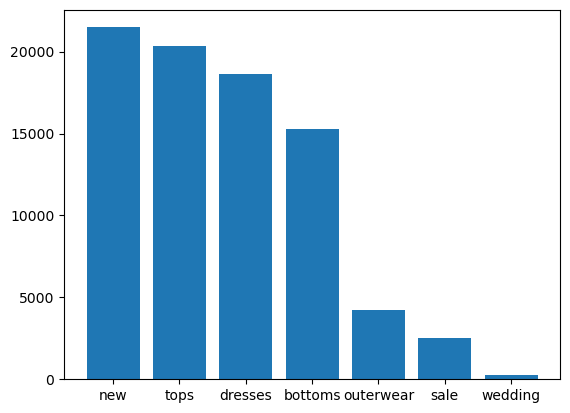

In [24]:
# Grafico a barre che mostra i volumi di vendita delle varie categorie
plt.bar(df_vestiti_mod['category'].value_counts().reset_index()['category'],
        df_vestiti_mod['category'].value_counts().reset_index()['count'])
plt.show()

Come si vede dal grafico il maggior numero di vendite è stato registrato dalla categoria new,
quindi abbiamo una clientela particolarmente affezionata alle novità. Questo viene confermato anche dalla categoria sale in penultima posizione.


Di seguito la percentuale di vendite di ciascuna categoria

In [25]:
df_con_percentuali = df_vestiti_mod['category'].value_counts().reset_index()
percentuali = []
for i in range(len(df_con_percentuali)):
    percentuali.append(df_con_percentuali['count'].iloc[i]/len(df_vestiti_mod)) 
df_con_percentuali['percentuali']=percentuali
df_con_percentuali

,category,count,percentuali
0,new,21487,0.259539
1,tops,20364,0.245975
2,dresses,18650,0.225271
3,bottoms,15266,0.184396
4,outerwear,4223,0.051009
5,sale,2524,0.030487
6,wedding,275,0.003322


Si metterà in relazione le vendite con la qualità usando il Net Promoter Score.

Ogni voto sarà convertito in una scala da 1 a 10 e si valuterà la qualità percepita di un certo prodotto venduto.

Se l'articolo venduto non ha una valutazione maggiore di 6 dovrà essere scartato, perchè rischia di causare delle pessime valutazioni da parte dei clienti nel nuovo ecommerce.

I dati null di quality sono pochi rispetto al totale.
Non considerùandoli si commette un errore piccolo:
- ∆(null)/totale = 8,2 x 10⁻⁴

Per questo motivo non si scarteranno e si farà una valutazione su tutto.

In [26]:
# Si definisce un DataFrame per vendite e qualità
df_quality = df_vestiti_mod[['item_id','quality']].value_counts().reset_index()
df_quality = df_quality.rename(columns={'count':'frequency'})
# Si crea una lista di prodotti unici
lista_item = list(set(df_quality['item_id'].tolist()))

In [29]:
# Si calcola il net promoter score delle recensioni per ogni singolo articolo
df_quality['frequency'] = df_quality['frequency'].astype(float)
media_pond = []
for item in lista_item:
    media_num = 0
    media_den = 0
    # Si crea un Dataframe di appoggio
    df1 = df_quality.loc[df_quality['item_id']==item,['quality','frequency']]
    for index in range(len(df1)):
        media_num += (df1.iloc[index]['quality'] * df1.iloc[index]['frequency'])
        media_den += df1.iloc[index]['frequency']
    media_pond.append(round(media_num/media_den,2)*2)

In [30]:
# Si crea un Dataframe che contiene sia gli item_id unici sia l' NPS dell'item
df_wavg= pd.DataFrame(lista_item,columns=['item_id'])
df_wavg['quality_wavg'] = media_pond
print(df_wavg)

      item_id  quality_wavg
0      204815          7.40
1      663571          7.14
2      696347          7.56
3      294941          8.80
4      401438          6.76
...       ...           ...
1371   384957          7.38
1372   688065          8.18
1373   131020          8.80
1374   229341         10.00
1375   196603         10.00

[1376 rows x 2 columns]


In [31]:
# Si eliminano gli item che non hanno una quality_wavg > 6
df_wavg_todrop = df_wavg[df_wavg['quality_wavg']<6]
# Creazione lista d'appoggio
lista_indici = []
for item in df_wavg_todrop['item_id']:
    lista_indici = lista_indici + list(df_vestiti_mod.loc[df_vestiti_mod['item_id']==item].index)
# Creazione DataFrame con prodotti con quality_wavg > 6
df_vestiti_mod = df_vestiti_mod.drop(lista_indici)

Si controlla la ripartizione delle vendite per categoria dopo aver eliminato i prodotti che non si ritengono idonei

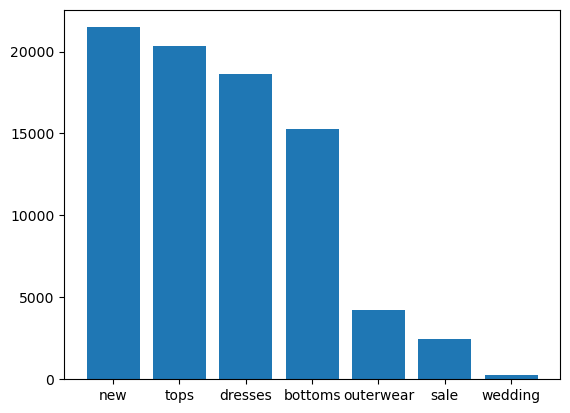

In [32]:
plt.bar(df_vestiti_mod['category'].value_counts().reset_index()['category'],
        df_vestiti_mod['category'].value_counts().reset_index()['count'])
plt.show()

    category  count  percentuali
0        new  21482        0.260
1       tops  20311        0.246
2    dresses  18626        0.225
3    bottoms  15247        0.185
4  outerwear   4223        0.051
5       sale   2470        0.030
6    wedding    275        0.003


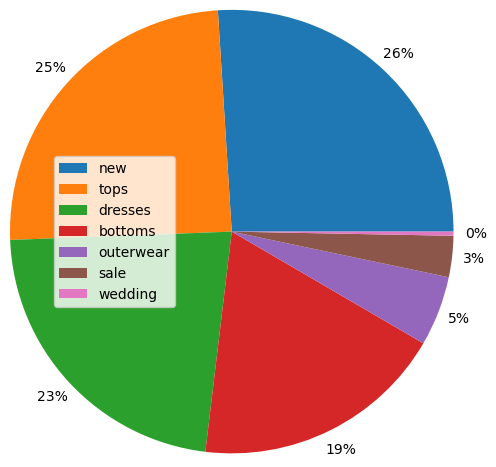

In [33]:
# DataFrame con percentuali modificate dopo l'eliminazione dei prodotti non idonei
df_percentuali_cat = df_vestiti_mod['category'].value_counts().reset_index()
percentuali = []
for i in range(len(df_percentuali_cat)):
    percentuali.append(round(df_percentuali_cat['count'].iloc[i]/len(df_vestiti_mod),3)) 
df_percentuali_cat['percentuali'] = percentuali 
print(df_percentuali_cat)
# Grafico a torta con le nuove percentuali
plt.pie(df_percentuali_cat['percentuali'], autopct='%1.0f%%', pctdistance=1.1,radius=1.5)
plt.legend(df_percentuali_cat['category'],loc='best')
plt.show()

Come si vede dai dati le quantità percentuali non variano molto anche dopo avere eliminato i prodotti con qualità insufficiente.

#

4) ANALISI OGGETTI PIÚ VENDUTI PER CATEGORIA

In [34]:
# Creazione DataFrame contenente 'item_id','category','frequency'
df_articolo = df_vestiti_mod[['item_id','category']].value_counts().reset_index()
df_articolo.columns = ['item_id','category','frequency']
# Si scelga una frequenza di vendita che si ritiene sufficente per mettere il prodotto in magazzino
vendita_minima = input('Frequenza minima di vendita per considerare di mettere tale oggetto nel magazzino?')
df_articolo = df_articolo[df_articolo['frequency']>int(vendita_minima)]
print(df_articolo)

Frequenza minima di vendita per considerare di mettere tale oggetto nel magazzino?50
     item_id   category  frequency
0     539980       tops       2008
1     668696    bottoms       1555
2     397005    dresses       1506
3     175771    dresses       1438
4     407134        new       1437
..       ...        ...        ...
210   668235    bottoms         53
211   123373        new         53
212   782669  outerwear         52
213   417902        new         51
214   645085       tops         51

[215 rows x 3 columns]


In [35]:
# Si osservano le percentuali di oggetti venduti per categoria
# lista per immagazzinare varie percentuali
lista_percent = []
# contatore per sommare le varie categorie
i = 0
for item in df_articolo['item_id']:
    lista_percent.append(round((df_articolo.loc[df_articolo['item_id']==item,'frequency']/
                         df_articolo[df_articolo['category']==df_articolo.iloc[i]['category']]['frequency'].sum()).item()
                         ,3) *100)
    i += 1
df_articolo['category_percent (%)'] = lista_percent
df_articolo

,item_id,category,frequency,category_percent (%)
0,539980,tops,2008,10.7
1,668696,bottoms,1555,10.8
2,397005,dresses,1506,8.9
3,175771,dresses,1438,8.5
4,407134,new,1437,7.0
...,...,...,...,...
210,668235,bottoms,53,0.4
211,123373,new,53,0.3
212,782669,outerwear,52,1.3
213,417902,new,51,0.2


#

5) RIPARTIZIONE DELLA QUANTITÀ DI ARTICOLI IN BASE ALLE PERCENTUALI DI VENDITA DELLE CATEGORIE

Quindi se una categoria ha venduto il 25% e un prodotto di questa categoria ha venduto il 10% del totale delle vendite della categoria stessa, si organizzerà il magazzino in modo che rispecchi il più fedelmente queste quantità

In [36]:
# Vado a creare il DataFrame finale con le varie percentuali di prodotti che andranno a comporre
# il magazzino

# Insieme di liste che andranno a formare il dataframe finale
lista_total_item = []
lista_total_category = []
lista_total_percent = []

for indice in df_articolo.index:
    lista_total_item.append(df_articolo.iloc[indice]['item_id'])
    lista_total_category.append(df_articolo.iloc[indice]['category'])
    lista_total_percent += (round(df_articolo.iloc[indice]['category_percent (%)']*
                                df_percentuali_cat.loc[df_percentuali_cat['category']==df_articolo.iloc[indice]['category'],'percentuali'],3)).tolist()    

# Dizionario per la creazione del DataFrame
total_percent = {'item_id' : lista_total_item,
                 'category' : lista_total_category,
                 'total_percent (%)' : lista_total_percent}
# In questo DataFrame si vanno a salvare gli elementi che faranno parte del magazzino
# con le relative percentuali
df_total_percent = pd.DataFrame(total_percent)
df_total_percent

,item_id,category,total_percent (%)
0,539980,tops,2.632
1,668696,bottoms,1.998
2,397005,dresses,2.002
3,175771,dresses,1.912
4,407134,new,1.820
...,...,...,...
210,668235,bottoms,0.074
211,123373,new,0.078
212,782669,outerwear,0.066
213,417902,new,0.052


#

6) ANALISI SCELTA DELLE TAGLIE

Per quanto riguarda le taglie la mia idea è di andare a prendere come campione tutto il dataframe e cercare di ricavare una distribuzione delle taglie stesse per poter creare un assortimento il più adeguato possibile.


In [37]:
df_vestiti_mod.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height (cm),user_name,length,fit,user_id,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.0,Emily,just right,small,991571,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.0,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.0,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.0,dberrones1,slightly long,small,944840,NaN,NaN


In [38]:
# Si crea un DataFrame con i dati su cui voglio andare a lavorare
df_size_cat = df_vestiti_mod[['category','size']]

In [39]:
# Si dà una rapida occhiata alle informazioni generali
df_size_cat.describe()

,size
count,82634.000000
mean,12.662754
std,8.271572
min,0.000000
25%,8.000000
50%,12.000000
75%,15.000000
max,38.000000


    a) Analisi distribuzione taglie

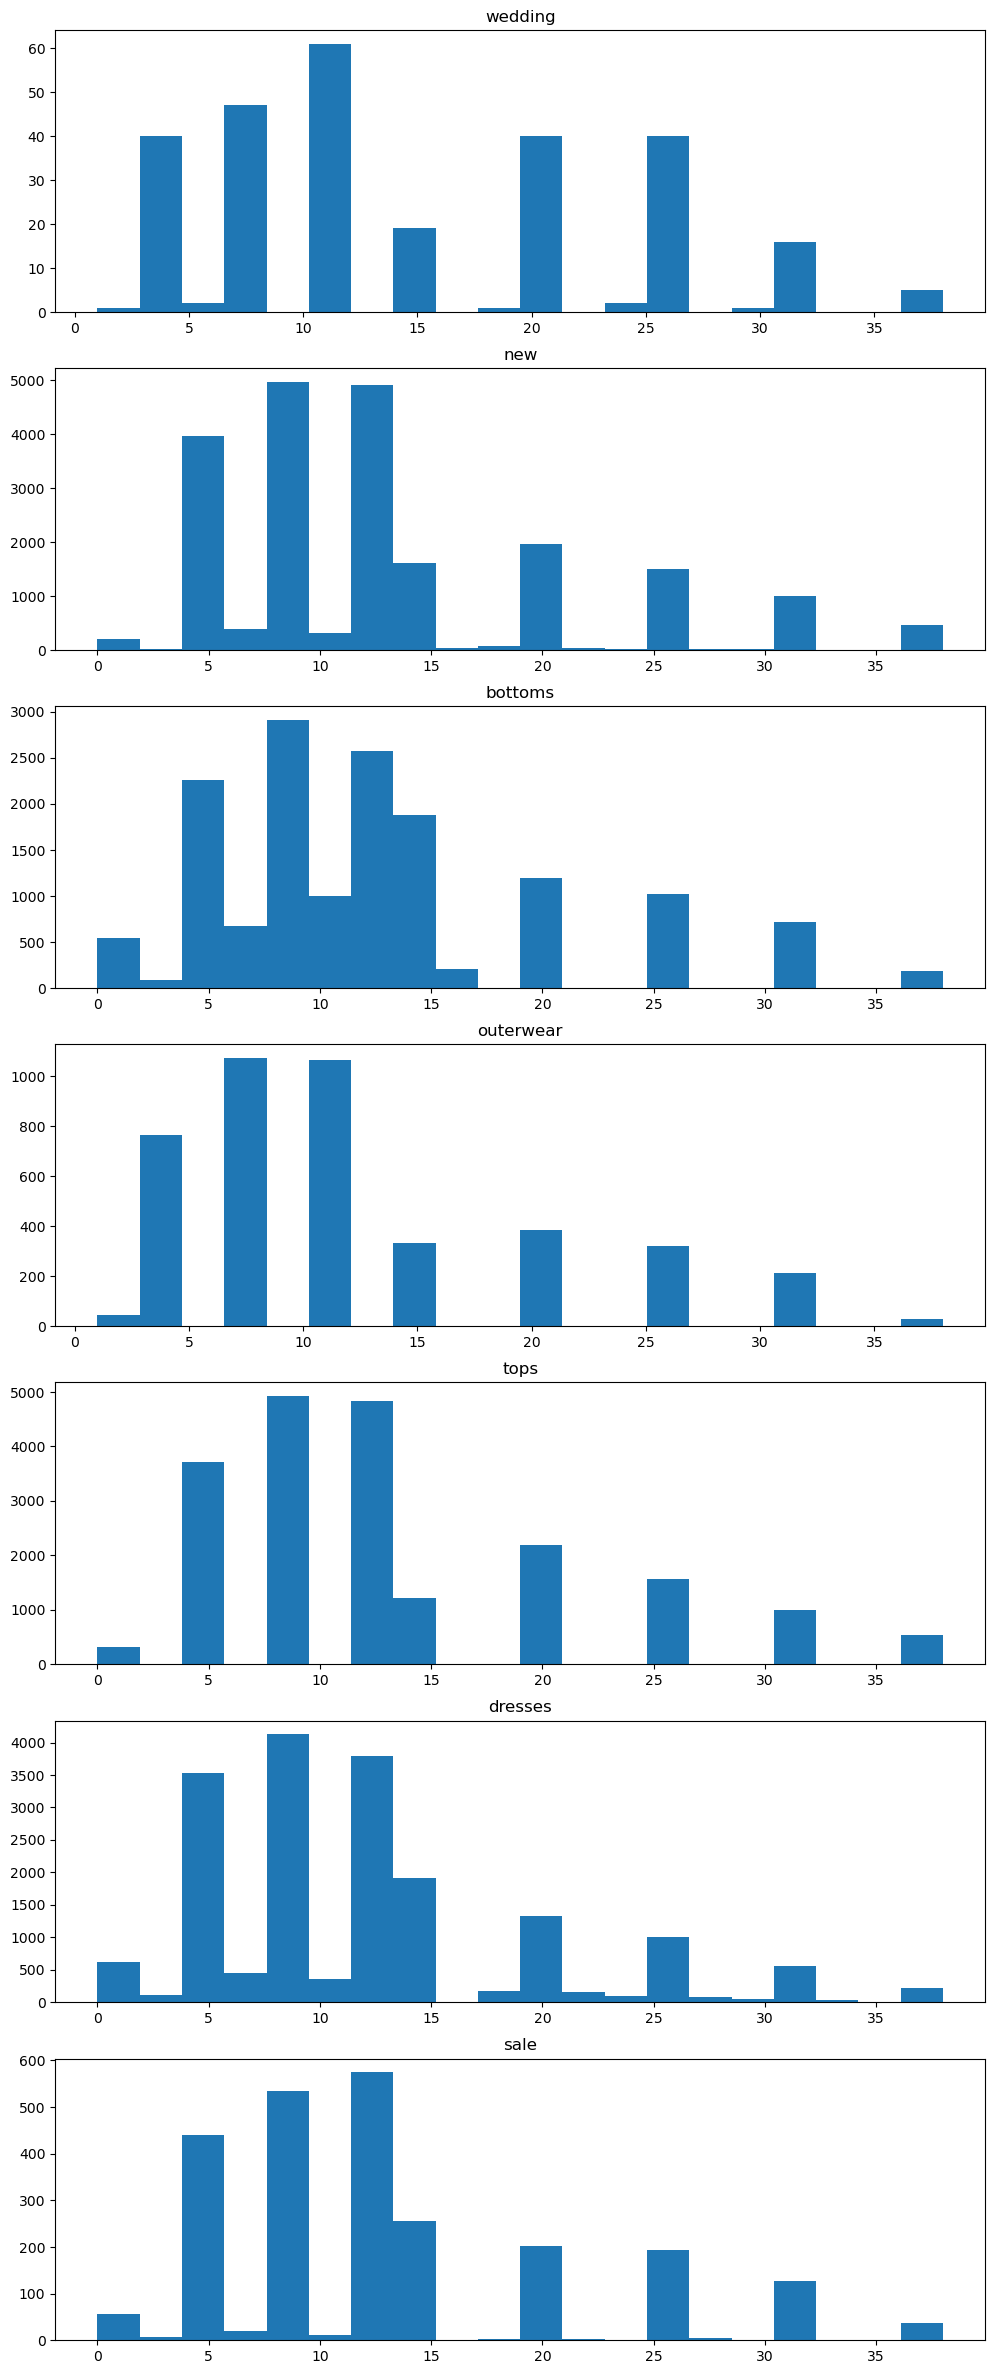

In [40]:
# Andiamo a plotare le varie size per categoria
fig,ax = plt.subplots(len(list(set(df_size_cat['category']))))
i = 0
fig.set_size_inches(12,12)
fig.set_figheight(30)
for cat in list(set(df_size_cat['category'])):
    ax[i].hist(df_size_cat.loc[df_size_cat['category']==cat,'size'],bins=20)
    ax[i].set_title(cat)
    i += 1
plt.show()

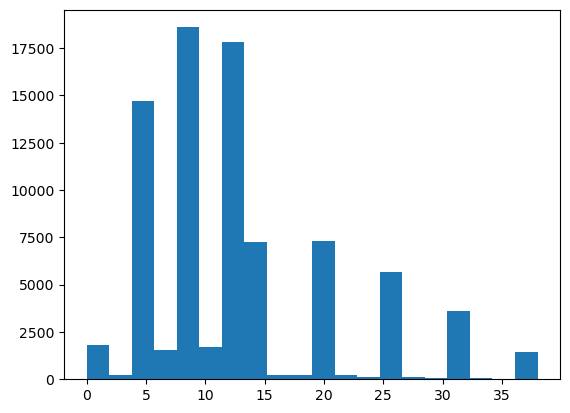

In [41]:
# Mostriamo un istogramma delle taglie in generale
plt.hist(df_size_cat['size'],bins=20)
plt.show()

    b) Selezione taglie

Come si vede dai grafici le taglie hanno distribuzioni simili in tutte le categorie. Si può procedere a fare una selezione delle taglie basata sul campione completo.

Si andrà a stabilire una lista di percentuali per le taglie presenti nel campione

In [43]:
# Calcolo percentuali totali singole taglie
# Creazione lista d'appoggio necessaria per aggiungere le varie percentuali
lista_size_percent = []
for size in df_size_cat['size'].value_counts().reset_index()['size']:
    lista_size_percent.append(100*(round(df_size_cat[df_size_cat['size']==size].value_counts().sum()/len(df_size_cat),3)))
df_total_size_percent = (df_size_cat['size']).value_counts().reset_index()
df_total_size_percent['percent_size'] = lista_size_percent
# DataFrame contenente le varie taglie, le loro entrate e le percentuali
df_total_size_percent

,size,count,percent_size
0,8,17863,21.6
1,12,17310,20.9
2,4,13853,16.8
3,20,7283,8.8
4,15,6866,8.3
5,26,5643,6.8
6,32,3606,4.4
7,1,1775,2.1
8,38,1459,1.8
9,10,1164,1.4


#

7) DATAFRAME CON I PRODOTTI SELEZIONATI. CIASCUN PRODOTTO È ACCOMPAGNATO DALLA PERCENTUALE DI MAGAZZINO SUGGERITA

Mostro la selezione di articoli 

In [44]:
df_total_percent

,item_id,category,total_percent (%)
0,539980,tops,2.632
1,668696,bottoms,1.998
2,397005,dresses,2.002
3,175771,dresses,1.912
4,407134,new,1.820
...,...,...,...
210,668235,bottoms,0.074
211,123373,new,0.078
212,782669,outerwear,0.066
213,417902,new,0.052


#

8) SUGGERIMENTO SULLA RIPARTIZIONE DELLE TAGLIE IN BASE ALLA FREQUENZA TROVATA NEL NOSTRO DATASET

Qui di seguito le taglie più frequenti.

Per quanto riguarda le taglie aggiungerei che si è visto dai grafici che la distribuzione di esse è pressochè analoga per tutte le categorie

In [45]:
df_total_size_percent

,size,count,percent_size
0,8,17863,21.6
1,12,17310,20.9
2,4,13853,16.8
3,20,7283,8.8
4,15,6866,8.3
5,26,5643,6.8
6,32,3606,4.4
7,1,1775,2.1
8,38,1459,1.8
9,10,1164,1.4


#

9) PULIZIA FINALE DATASET

Adesso andiamo a trattare i dati mancanti nel DataFrame modificato.

Si cercano le colonne con un totale di dati mancanti maggiore dell' 85% e scartarle.
Questo perchè lo scopo è creare un ecommerce, vogliamo basarci su dati il più solidi possibile.

In [46]:
# Somma dati nulli 
dati_mancanti = df_vestiti_mod.isnull().sum()
# Dati nulli in percentuale
dati_mancanti_perc = 100*dati_mancanti/len(df_vestiti)
# Rimozione delle colonne > 85%
for index, dati in enumerate(dati_mancanti_perc):
    if dati > 85:
        df_vestiti_mod = df_vestiti_mod.drop(dati_mancanti_perc.index[index],axis=1)

In [47]:
# DataFrame senza colonne > 85%
df_vestiti_mod

,item_id,size,quality,cup size,hips,bra size,category,height (cm),user_name,length,fit,user_id,review_summary,review_text
0,123373,7,5.0,d,38.0,34.0,new,167.0,Emily,just right,small,991571,NaN,NaN
1,123373,13,3.0,b,30.0,36.0,new,157.0,sydneybraden2001,just right,small,587883,NaN,NaN
2,123373,7,2.0,b,NaN,32.0,new,170.0,Ugggh,slightly long,small,395665,NaN,NaN
3,123373,21,5.0,dd/e,NaN,NaN,new,NaN,alexmeyer626,just right,fit,875643,NaN,NaN
4,123373,18,5.0,b,NaN,36.0,new,157.0,dberrones1,slightly long,small,944840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,8,4.0,b,NaN,36.0,outerwear,172.0,Jennifer,just right,fit,727820,Cute jacket!,Cute jacket!
82786,807722,12,5.0,ddd/f,NaN,34.0,outerwear,165.0,Kelli,slightly long,small,197040,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5.0,dddd/g,36.0,32.0,outerwear,162.0,elacount,just right,fit,102493,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,12,4.0,NaN,NaN,NaN,outerwear,160.0,jennaklinner,just right,fit,756491,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


#

10) CONCLUSIONI 

In conclusione abbiamo trovato che:

- La nostra clientela predilige gli oggetti della categoria NEW come si può vedere da qui:

In [48]:
 df_vestiti_mod['category'].value_counts().reset_index()

,category,count
0,new,21482
1,tops,20311
2,dresses,18626
3,bottoms,15247
4,outerwear,4223
5,sale,2470
6,wedding,275


- L' oggetto più venduto è della categoria TOPS, come si può vedere:

In [49]:
df_total_percent

,item_id,category,total_percent (%)
0,539980,tops,2.632
1,668696,bottoms,1.998
2,397005,dresses,2.002
3,175771,dresses,1.912
4,407134,new,1.820
...,...,...,...
210,668235,bottoms,0.074
211,123373,new,0.078
212,782669,outerwear,0.066
213,417902,new,0.052


- La distribuzione delle taglie è normale in tutte le categorie e la ripartizione si quantifiaca così:

In [50]:
df_total_size_percent.loc[:,['size','percent_size']]

,size,percent_size
0,8,21.6
1,12,20.9
2,4,16.8
3,20,8.8
4,15,8.3
5,26,6.8
6,32,4.4
7,1,2.1
8,38,1.8
9,10,1.4


- I dati sulle scarpe dopo un' attenta valutazione, sono stati ritenuti superflui

In [53]:
df_shoes_finale

,index,review_text
0,6748,This dress is fantastic! I was hesitant to buy...
1,6757,This dress is a piece you can keep in your clo...
2,7059,"Lovely dress, lovely color, very happy. I'm in..."
3,7076,Love this dress! Wore it for a wedding with a ...
4,7308,"Love it. I got it for a wedding, wore it with ..."
...,...,...
197,81855,"I usually wear a 2x in modcloth dresses, I got..."
198,82178,An absolutely fabulous coat! Like opening a Ch...
199,82264,I've been searching for the perfect winter coa...
200,82506,Great quality and a beautiful coat but take in...


#

Passaggi dell' elaborato:

1) Analisi esplorativa dei dati così impostata:
        
        a) Informazioni generiche sui dati
        b) Distribuzione numerica dei dati e ricerca di outliers
        c) Conversione altezza in dato numerico e sostituzioni dati nulli 
           con altezza media
    
2) Analisi sui dati riguardanti le misure per le scarpe per capire se tra gli articoli venduti c'è un quantitativo importante di calzature. Nel caso non avessimo un risultato soddisfacente procediamo con lo scartare i dati sulle misure delle scarpe.

3) Analisi delle categorie di abbigliamento per vedere quali mostrano volumi di vendita migliori

4) Analisi item più venduti per categoria

5) Ripartizione della quantità di articoli in base alle percentuali di vendita delle categorie

6) Analisi scelta delle taglie così impostata:
                
        a) Analisi distribuzione delle taglie
        b) Selezione taglie
 
7) DataFrame con i prodotti selezionati. Ciascun prodotto è accompagnato dalla percentuale di magazzino suggerita

8) Suggerimento sulla ripartizione delle taglie in base alla frequenza trovata nel nostro dataset

9) Pulizia finale Dataset

10) Conclusioni